<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [71]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr

In [72]:
! pip install pandas_datareader

After COVID-19 Pandemic, the stock market seems to have slowed down and crypto continues to have high volatility. I wanted to figure out more for what directions some stocks are moving for my portfolio, to see if they make up good performances. Some of these analyses will help determine what stocks to invest in.
<br><br>


<h2 style="color:Green;">Preliminary Visualization</h2>

4 stocks to take a look at and analyze their movements.

In [73]:
symbolList =  ['AAPL',  'CMG', 'AMZN', 'TSLA',] # asset ticker symbols 
START_DATE = '2016-05-01' # asset data start date 
END_DATE = '2022-05-01' # asset data end date

In [74]:
stockPxList = pdr.DataReader(symbolList , 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
stockLogRetList = np.log(stockPxList).diff().dropna()

2 Different ways to visualize the data for these stocks. A line graph and a change daily graph.

Visualization #1: 

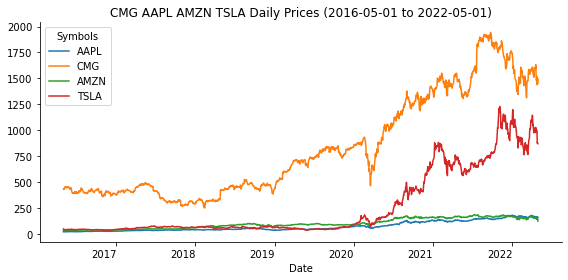

In [75]:
################ EDIT CODE LINES HERE #################
ax = stockPxList.plot(figsize=(8, 4),
                  title=symbolList[0]+ ' ' + symbolList[1]+ ' ' + symbolList[2]+ ' ' + symbolList[3] + ' Daily Prices '+ '(' + START_DATE + ' to ' + END_DATE + ')',
                      rot=0)
sns.despine()
plt.tight_layout();



#####################################################

Visualization #2:

AAPL


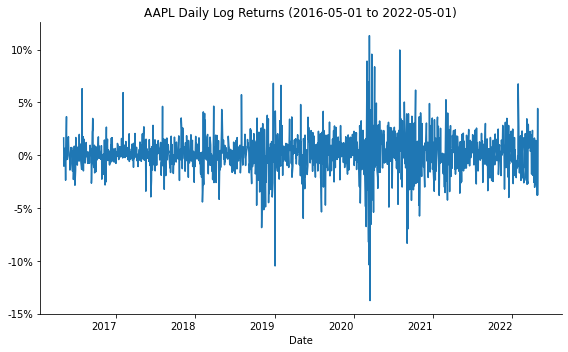

In [76]:

ax = stockLogRetList['AAPL'].plot(figsize=(8, 5),
                      title=symbolList[0]+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',
                      rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();
print(symbolList[0])


CMG


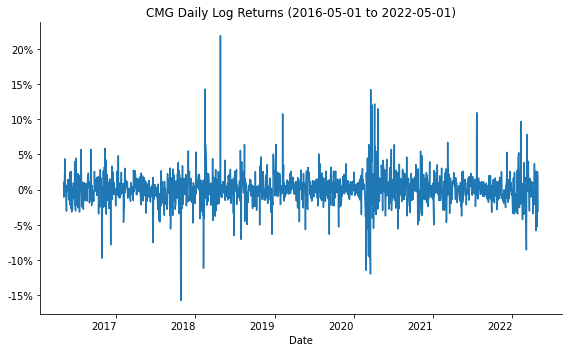

In [77]:
ax = stockLogRetList['CMG'].plot(figsize=(8, 5),
                      title=symbolList[1]+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',
                      rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();
print(symbolList[1])

AMZN


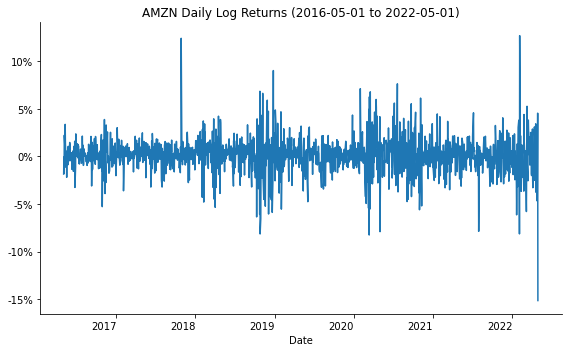

In [78]:
ax = stockLogRetList['AMZN'].plot(figsize=(8, 5),
                      title=symbolList[2]+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',
                      rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();
print(symbolList[2])

TSLA


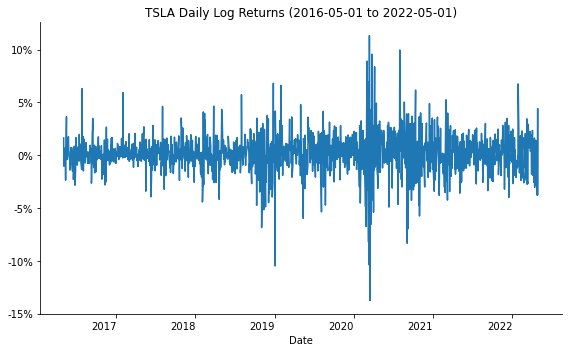

In [79]:
ax = stockLogRetList['AAPL'].plot(figsize=(8, 5),
                      title=symbolList[3]+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',
                      rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();
print(symbolList[3])

Here are some of the things I've noticed about the stocks.

For Apple stock, it is very dynamic, having its peaks and dips, but ultimately levels off near the end of 2022. Also its log returns have drastic highs and lows, probably due to the releases of new products. 
For Chipotle stock, it has a much more noticable dip at the start of 2020 (COVID) compared to the other two, but has much more steady growth afterward (probably since it is not a tech company). For its log returns it has some high returns in earlier years but levels off in 2020-2022.
For Amazon stock, it kinda of levels off starting at mid 2020, but then starts to dip at the end of the graph. For the second visual it tells me how Amazon does not really have a very consistent high and low return, and fluctuates violently, especially at the beginning of 2022 it growing and at the end of the graph where there is a massive negative return.
Finally for Tesla stock, it begins to heavily grow during 2020 and reaches one of its highest peaks and has its highest peak at the end of 2021. For its log returns it is very volatile, with lots of high growth periods followed by lots of high loss periods.


<h2 style="color:Green;">Preliminary Normality Testing</h2>

The following code tests to see whether or not the stocks follow a normal distribution, since a lot of the stocks on the market during these times are very volatile

In [80]:
shapiro_test1 = stats.shapiro(stockLogRetList['AAPL'])
shapiro_test1.pvalue

4.4806028302790175e-27

In [81]:
shapiro_test1 = stats.shapiro(stockLogRetList['CMG'])
shapiro_test1.pvalue

8.564088337486761e-33

In [82]:
shapiro_test1 = stats.shapiro(stockLogRetList['AMZN'])
shapiro_test1.pvalue

1.1225993734196472e-26

In [83]:
shapiro_test1 = stats.shapiro(stockLogRetList['TSLA'])
shapiro_test1.pvalue

1.6450008604496873e-26

Since all the p-values are less than 0.05, we reject the null hypothesis and the data is significant because it follows a normal distribution. It also shows how the assets are "normal".

<h2 style="color:Green;">Preliminary Pre-processing </h2>

We want about 50-50 data split for analysis testing, so we are going to make some changes.

a) Specify the ticker of the asset whose direction you are interested in predicting. This stock shall be different than the ones you chose in problem 1.

In [84]:
SYMBOL = 'AMD' # asset ticker symbol

The following code changes all upwards movements to 1 and downward movements to 0.

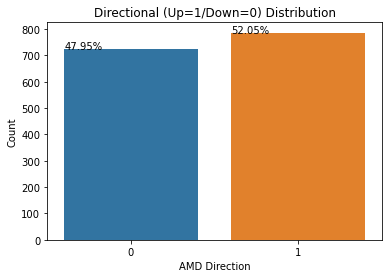

In [85]:
FEATURES = symbolList.copy()
stockPx = pdr.get_data_yahoo(SYMBOL, START_DATE, END_DATE)['Adj Close'] # storing adjusted stock prices into a variable 
stockPx01 = (stockPx.pct_change().dropna() > 0).astype(int)
# visualize directional label distribution
ax = sns.countplot(x = stockPx01)
plt.title('Directional (Up=1/Down=0) Distribution')
plt.xlabel(SYMBOL + ' Direction')
plt.ylabel('Count')
total = len(stockPx01)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

In [86]:
stockPxLog = np.log(stockPx).diff().dropna()
stockPxLog.info

<bound method Series.info of Date
2016-05-03   -0.038152
2016-05-04    0.000000
2016-05-05    0.016529
2016-05-06    0.005450
2016-05-09   -0.008186
                ...   
2022-04-25    0.028521
2022-04-26   -0.062915
2022-04-27   -0.002940
2022-04-28    0.054210
2022-04-29   -0.047051
Name: Adj Close, Length: 1510, dtype: float64>

In [87]:
stockLogRetListNew=pd.merge(stockPxLog, stockLogRetList, on='Date')
stockLogRetListNew.info


<bound method DataFrame.info of             Adj Close      AAPL       CMG      AMZN      TSLA
Date                                                         
2016-05-03  -0.038152  0.016312  0.010213 -0.018493 -0.039995
2016-05-04   0.000000 -0.010456 -0.010674 -0.000626 -0.042919
2016-05-05   0.016529 -0.004067  0.003916 -0.017760 -0.050830
2016-05-06   0.005450 -0.005593 -0.002739  0.022296  0.015946
2016-05-09  -0.008186  0.000755  0.043661  0.008569 -0.028361
...               ...       ...       ...       ...       ...
2022-04-25   0.028521  0.006715  0.023459  0.011872 -0.007019
2022-04-26  -0.062915 -0.038043 -0.052676 -0.046830 -0.129928
2022-04-27  -0.002940 -0.001468  0.025686 -0.008820  0.005791
2022-04-28   0.054210  0.044166  0.016927  0.045484 -0.004548
2022-04-29  -0.047051 -0.037292 -0.030587 -0.151398 -0.007722

[1510 rows x 5 columns]>

In [88]:
stockLogRetListNew.rename(columns = {'Adj Close': SYMBOL}, 
          inplace=True)

In [89]:
FEATURES = symbolList
LABEL = SYMBOL
stockLogRetListNew.loc[:, FEATURES] = scale(stockLogRetListNew.loc[:, FEATURES])
stockLogRetListNew.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2016-05-03 to 2022-04-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMD     1510 non-null   float64
 1   AAPL    1510 non-null   float64
 2   CMG     1510 non-null   float64
 3   AMZN    1510 non-null   float64
 4   TSLA    1510 non-null   float64
dtypes: float64(5)
memory usage: 70.8 KB


Balanced, since AMD follows a normal distribution and about 50% of the data lies on each side of the curve.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(stockLogRetListNew.loc[:, FEATURES], stockLogRetListNew.loc[:, LABEL], test_size=0.2, random_state=0)

Here are the feature importances of the 4 stocks represented by a bar plot.

Text(0.5, 0, 'Relative Importance')

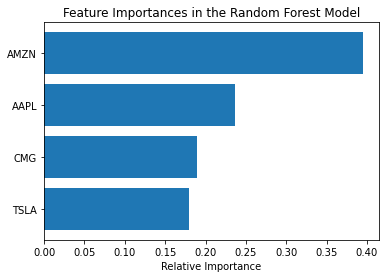

In [91]:

from sklearn.ensemble import RandomForestRegressor # importing the random forest module

rf_model = RandomForestRegressor(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores

plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

It shows that AMZN is most important for predicting the eventual path of AMD, since it provides the most significant data towards reaching the conclusion.